In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [3]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

training score : 0.995 (multinomial)
y = -1.93639453081448 X + -2.009631704746138
y = -43.570484413059106 X + 37.997558970937504
y = -3.8102173204007643 X + -0.2090306624884508
training score : 0.976 (ovr)
y = -1.045775846524645 X + -0.6965261209832532
y = 3.4757584172725062 X + -1.5478722741103714
y = -3.78048509295826 X + -0.18161590222993418


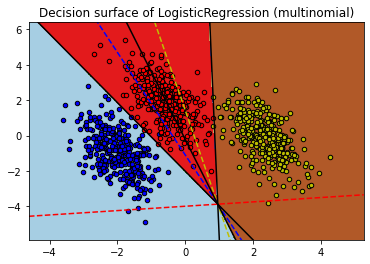

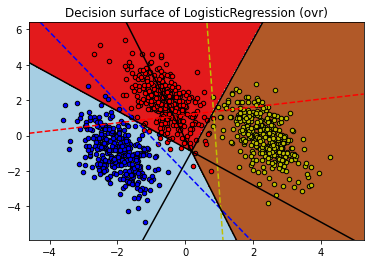

In [68]:
for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class=multi_class
    ).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

    
    collections = [(0, 1), (1, 2), (0, 2)]
    for i, j in collections:
        tmp_intercept = (intercept[i] - intercept[j]) / (coef[j, 1] - coef[i, 1])
        slope = -(coef[j, 0] - coef[i, 0]) / (coef[j, 1] - coef[i, 1])
    
        print(f'y = {slope} X + {tmp_intercept}')
        array = np.arange(xmin, xmax, 0.1)
        plt.plot(array, array * slope + tmp_intercept, color='black')
    
plt.show()


y = 1.9796548534599439 X + 2.0666447204488825
y = -0.22433940267718458 X + -1.166893565585324
y = 25.934241118895166 X + -23.007948346933592


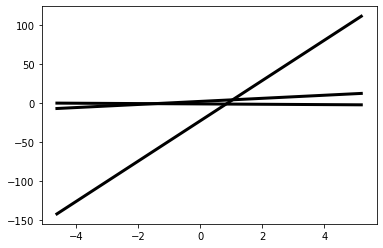

In [63]:
for i in range(3):
    slope = coef[i][0]/coef[i][1]
    tmp_intercept = intercept[i]/coef[i][1]
    print(f'y = {slope} X + {tmp_intercept}')
    array = np.arange(xmin, xmax, 0.1)
    plt.plot(array, array * slope + tmp_intercept, color='black' ,linewidth=3)
    

In [49]:
print(X[5], y[5])

[-0.79264924  2.71049929] 1


In [54]:
coef[0].T @ X[5] + intercept[0]

-7.156249019208366